# План действий
1. Применить маску к фотографиям \(убрать море, чтобы сеть быстрее обучалась\)
2. Использовать полноразмерные изображения \(выше точность\(?\)
3. SIFT / ROOTSIFT для извлечения точек
4. FAISS для сопоставления точек
5. Применить метод Keypoint Matching

![image](researchings/img.png 'Title')

# Импорт библиотек

In [4]:
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import matplotlib.pyplot as plt
from keras import layers
from pathlib import Path
import numpy as np
import cv2

print('Библиотеки успешно загружены')

Библиотеки успешно загружены


# Установить корневую папку для датасета

In [ ]:
root = Path('dataset')
train

# Загрузить дата-сет

In [5]:
# dataset = keras.utils.image_dataset_from_directory('Whale ReId 2_mm', labels='inferred', shuffle='False', batch_size=64, interpolation='mitchellcubic',color_mode='rgb')
# masks = keras.utils.image_dataset_from_directory('Whale ReId 2_mm masked', labels='inferred', shuffle='False', batch_size=64, color_mode='grayscale')
image_size = (128, 384)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory('Whale ReId 2_mm', labels='inferred', validation_split=0.2, subset='both', seed=1337, batch_size=batch_size, interpolation='mitchellcubic', image_size=image_size)

NotFoundError: Could not find directory Whale ReId 2_mm

Вывод

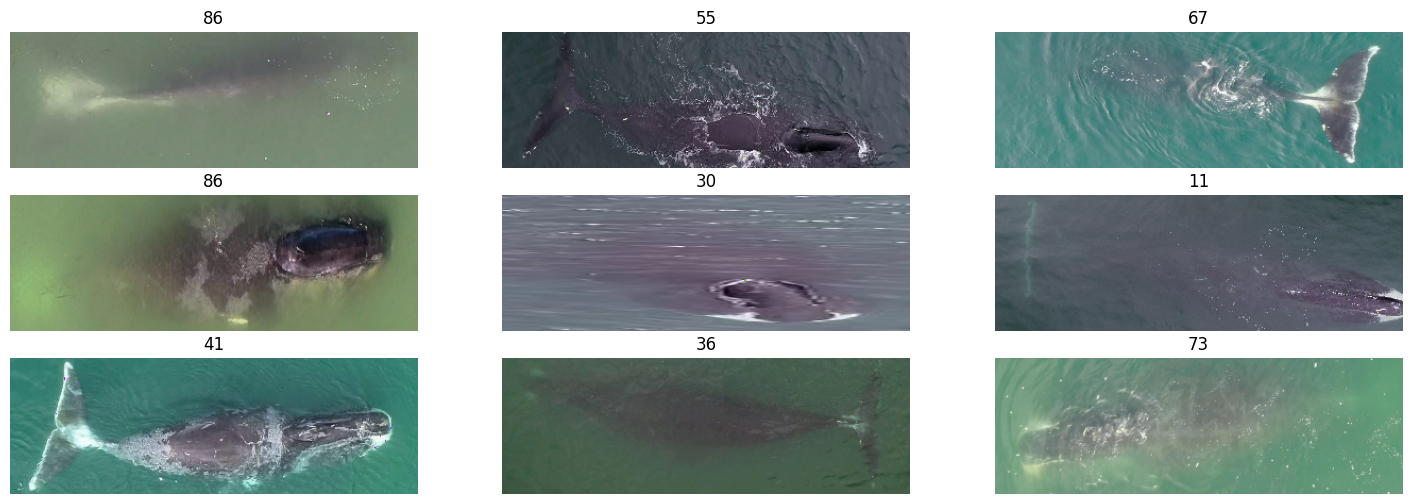

In [17]:
#classes = train_ds.class_names

def show_img(ds):
    plt.figure(figsize=(18, 6))
    for images, labels in ds.take(1):
        for j in range(9):
            # augmented_images = data_augmentation(images)
            plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].numpy().astype('uint8'))
            plt.title(int(labels[j]))
            plt.axis('off')

show_img(train_ds)

In [74]:
# train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
# val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [75]:
# def make_model(input_shape, num_classes):
#     inputs = keras.Input(shape=input_shape)
#     #x = data_augmentation(inputs)
#     # Входной блок
#     x = layers.Rescaling(1. / 255)(inputs)
#     x = layers.Conv2D(128, 3, strides=2, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#
#     previous_block_activation = x
#
#     for size in [256, 512, 728]:
#         x = layers.Activation('relu')(x)
#         x = layers.SeparableConv2D(size, 3, padding='same')(x)
#         x = layers.BatchNormalization()(x)
#
#         x = layers.Activation('relu')(x)
#         x = layers.SeparableConv2D(size, 3, padding='same')(x)
#         x = layers.BatchNormalization()(x)
#
#         x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
#
#         residual = layers.Conv2D(size, 1, strides=2, padding='same')(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])
#         previous_block_activation = x
#
#     x = layers.SeparableConv2D(1024, 3, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#
#     x = layers.GlobalAveragePooling2D()(x)
#
#     activation = 'softmax'
#     units = num_classes
#
#     x = layers.Dropout(0.5)(x)
#     outputs = layers.Dense(units, activation=activation)(x)
#     return keras.Model(inputs, outputs)

In [ ]:
# model = make_model(input_shape=image_size + (3,), num_classes=102)
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# epochs = 20
#
# callbacks = [
#     keras.callbacks.ModelCheckpoint('save_at_{epoch}.keras'),
#     keras.callbacks.EarlyStopping(
#         monitor="val_accuracy", patience=2, restore_best_weights=True
#     ),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss = 'SparseCategoricalCrossentropy',
#     metrics = ['accuracy'],
# )
# history = model.fit(
#     train_ds,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_data=val_ds,
# )

In [ ]:
# img = keras.utils.load_img('test.jpg', target_size=image_size)
# img_array = keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)
#
# predictions = model.predict(img_array)
# # score = float(predictions[0])
# for i in predictions[0]:
#     print(f'Score {1 - i}')


In [ ]:
# def plot_hist(hist):
#     plt.plot(hist.history["accuracy"])
#     plt.plot(hist.history["val_accuracy"])
#     plt.plot(hist.history["loss"])
#     plt.plot(hist.history["val_loss"])
#     plt.title("Training Progress")
#     plt.ylabel("Accuracy/Loss")
#     plt.xlabel("Epochs")
#     plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
#     plt.show()
#
#
# plot_hist(history)

In [6]:
from PIL import Image


images = Path('Whale ReId 2_mm').glob('**/*.jpg')
print(str(next(images)))
img = cv2.imread(str(next(images)), 0)

cv2.imshow('sss', img)
cv2.waitKey(0)

StopIteration: 